In [4]:
# this block initializes the structs for storing acitivities and patients

import os
from datetime import datetime
import pandas as pd
import time
from patient import Patient, Activity
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import math

True

In [50]:
src = os.getenv(SRC)
# to-do

excel = "C:\\Users\\Chang\\Documents\\researchstuff\\MS\\chi_unix.xlsx"
excel = pd.read_excel(excel)


activities = []
ids = []
patients = []

for i in range(len(excel)):
    row = excel.iloc[i]
    if row['Subject Index'] not in ids:
        ids.append(row['Subject Index'])

for id in ids: #flagging dupes for merging
    if len(id) >= 12:
        print(id)

temp_hold= []

for id in ids:
    # fetch all activities for each patients
    activities = []
    for i in range(len(excel)):
        act = excel.iloc[i]
        if act['Subject Index'] == id:            
            activities.append(Activity(
                act['Activity'], act['Length'], act['Record Time'], act['Subject Index']))
    patient = Patient(id, 0, activities, [None], 0, 0)
    
    if len(id) >=12:
        temp_hold.append(patient)
    else:
        patients.append(patient)



CHI2021 103b
CHI2021 105b
CHI2021 107b
CHI2021 104b


In [3]:

#merging temp hold with patients
for temp in temp_hold:
    found = 0
    for patient in patients:
        if patient.id in temp.id:
            patient.activities =  patient.activities + temp.activities #merge activities
            #update excel time
            patient.findMinTime()
            found =1
            break
    if (found ==0):
        temp.id = temp.id[:-1]
        print(temp.id)
        patients.append(temp)
    
            

CHI2021 103


In [52]:
#load in csvs
src = "C:\\Users\\Chang\\Documents\\researchstuff\\MS\\HOA_Data\\HOA_Data"
csv_file = []


for path, subdirs, files in os.walk(src):
    for name in files:  # for every file in this directory
        file = os.path.join(path, name)

        if 'ACC.csv' in file:  # if file name contains acc.csv, read data
            acc = pd.read_csv(file)
            csv_file.append(acc)  # append to a list

print(len(patients), len(csv_file))



53 39


In [53]:
for patient in patients:
    #for every unique patient - cross reference csvs
    buffer = 3*60*60
    markers  = [0]*len(csv_file)
    for i,csv in enumerate(csv_file):
        if csv is None:
            continue
        time = float(csv.columns.values[0])
        
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time +buffer):  # within buffer
            patient.clean_acc(csv)
            markers[i]=1
            csv_file[i]=None
            i-=1
            break
    print(sum(markers), patient.id)
print(csv_file)

0 CHI2021 231
1 CHI2021 223
1 CHI2021 224
0 CHI2021 114
0 CHI2021 309
0 CHI2021 311
1 CHI2021 229
1 CHI2021 230
1 CHI2021 307
1 CHI2021 115
1 CHI2021 111
1 CHI2021 225
1 CHI2021 113
1 CHI2021 210
1 CHI2021 227
1 CHI2021 112
1 CHI2021 222
1 CHI2021 207
1 CHI2021 221
1 CHI2021 228
1 CHI2021 220
1 CHI2021 219
1 CHI2021 213
1 CHI2021 106
1 CHI2021 216
1 CHI2021 214
1 CHI2021 217
1 CHI2021 206
1 CHI2021 208
1 CHI2021 306
1 CHI2021 211
1 CHI2021 212
1 CHI2021 110
1 CHI2021 209
0 CHI2021 304
0 CHI2021 215
0 CHI2021 303
0 CHI2021 305
0 CHI2021 302
0 CHI2021 202
0 CHI2021 204
0 CHI2021 301
0 CHI2021 109
0 CHI2021 108
0 CHI2021 205
0 CHI2021 203
0 CHI2021 201
0 CHI2021 107
0 CHI2021 105
0 CHI2021 104
0 CHI2021 101
0 CHI2021 102
0 CHI2021 103
[     1622747449.000000   1622747449.000000   1622747449.000000.1
0                 32.0                32.0                  32.0
1                -42.0                41.0                  30.0
2                -39.0                40.0                  31

In [54]:
#print(jsonpickle.encode(patients[11], indent=4))
print('Patients without hits')

lost_patients = []
for patient in patients:
    if (patient.acc  is None):
        print(patient.id, patient.excel_time)
        lost_patients.append(patient)
print('Not found patients: ', len(lost_patients))

print('Csvs without hits')
lost_csvs = []
for csv in csv_file:
    if csv is not None:
        print(csv.head())
        lost_csvs.append(csv)
print('Not found CSVs:',  len(lost_csvs))


Patients without hits
CHI2021 231 1632940487
CHI2021 114 1628972286
CHI2021 309 1628606519
CHI2021 311 1628536683
CHI2021 304 1622902439
CHI2021 215 1622819510
CHI2021 303 1622557209
CHI2021 305 1622485854
CHI2021 302 1622218433
CHI2021 202 1622138631
CHI2021 204 1621513330
CHI2021 301 1622047028
CHI2021 109 1621957075
CHI2021 108 1621880215
CHI2021 205 1621621226
CHI2021 203 1621453259
CHI2021 201 1621017177
CHI2021 107 1620079227
CHI2021 105 1619803740
CHI2021 104 1619644918
CHI2021 101 1619469002
CHI2021 102 1619194627
CHI2021 103 1622064809
Not found patients:  23
Csvs without hits
   1622747449.000000   1622747449.000000   1622747449.000000.1
0               32.0                32.0                  32.0
1              -42.0                41.0                  30.0
2              -39.0                40.0                  31.0
3              -38.0                40.0                  30.0
4              -40.0                40.0                  28.0
   1622752193.000000   162275

In [7]:
#second pass to match up lost_csvs with lost_patients
buffer = 2000 *60 *60
for i, csv in enumerate(lost_csvs):
    if csv is None:
        continue
    time = float(csv.columns.values[0])
    for patient in lost_patients:
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time + buffer):  # within buffer
            print('match')
            break

match
match
match
match
match
match
match
match
match


In [8]:
#### TO-DO


for patient in patients:
    #for patient in patients
    local_time = patient.csv_time
    if patient is None or patient.acc is None:
        continue
    
    print(patient.id, local_time, local_time + len(patient.acc))
    for activity in reversed(patient.activities):
        # Convert global start and end times of the activity to the patient.acc time scale
        activity_start_time_local = activity.start - patient.csv_time
        activity_end_time_local = activity.start + activity.length - patient.csv_time
        # print(activity_start_time_local, activity_end_time_local)
        if (0 <= activity_start_time_local <= round(patient.acc['t'].iloc[-1])) and (0 <= activity_end_time_local <= round(patient.acc['t'].iloc[-1])):

            print(f"TIME IN ACC: {activity_start_time_local}, {activity_end_time_local}\t\tGlobal: {activity.start},{ activity.start + activity.length}")
            # Find the rows in patient.acc that correspond to the activity's time range
            activity_data = patient.acc[(patient.acc['t'] >= activity_start_time_local) & (patient.acc['t'] <= activity_end_time_local)]
            
            # Calculate the resultant
            activity_data['resultant'] = np.sqrt(activity_data['x']**2 + activity_data['y']**2 + activity_data['z']**2)
            activity.acc = activity_data

            activity_folder_path = "Activity"
            if not os.path.exists(activity_folder_path):
                os.makedirs(activity_folder_path)  # Create the "Activity" folder if not

            activity_subfolder_path = os.path.join(activity_folder_path, activity.name)
            if not os.path.exists(activity_subfolder_path): #check if activity.name exists inside act folder
                os.makedirs(activity_subfolder_path)

            base_file_path = os.path.join(activity_subfolder_path, f"{patient.id} {activity.name}")

            suffix = 0
            file_path = f"{base_file_path}.csv"

            # Check if the file exists and find a unique file name by appending a suffix
            while os.path.exists(file_path):
                suffix += 1
                file_path = f"{base_file_path}_{suffix}.csv"

            activity.acc.to_csv(file_path, index=False)


    print("")

CHI2021 223 1627656930.0 1628058671.0
Local:  329.0   995.0 Global:  1627657259   1627657925
Local:  1009.0   1169.0 Global:  1627657939   1627658099
Local:  1009.0   1169.0 Global:  1627657939   1627658099
Local:  1155.0   1408.0 Global:  1627658085   1627658338
Local:  1661.0   2540.0 Global:  1627658591   1627659470
Local:  3806.0   4352.0 Global:  1627660736   1627661282
Local:  5844.0   6683.0 Global:  1627662774   1627663613
Local:  6776.0   8268.0 Global:  1627663706   1627665198
Local:  8374.0   8680.0 Global:  1627665304   1627665610
Local:  8734.0   8974.0 Global:  1627665664   1627665904
Local:  8974.0   9054.0 Global:  1627665904   1627665984
Local:  9560.0   9747.0 Global:  1627666490   1627666677
Local:  9866.0   9999.0 Global:  1627666796   1627666929
Local:  10106.0   10319.0 Global:  1627667036   1627667249
Local:  10346.0   10599.0 Global:  1627667276   1627667529
Local:  11438.0   11611.0 Global:  1627668368   1627668541
Local:  11598.0   11838.0 Global:  1627668528 

In [17]:
matched_patients[0].acc

,x,y,z,t
2,3.218906,-2.605781,8.737031,0.00000
3,3.065625,-2.605781,8.583750,0.03125
4,3.065625,-2.605781,8.737031,0.06250
5,2.759063,-2.605781,8.583750,0.09375
6,2.605781,-2.605781,8.737031,0.12500
...,...,...,...,...
401738,3.832031,1.226250,8.430469,12554.25000
401739,3.832031,1.226250,8.583750,12554.28125
401740,3.985313,1.226250,8.583750,12554.31250
401741,3.832031,1.226250,8.583750,12554.34375


In [14]:
matched_patients[0].activities[-1].acc

,x,y,z,t,resultant
10530,9.350156,2.452500,0.153281,329.00000,9.667661
10531,9.350156,2.299219,0.153281,329.03125,9.629918
10532,9.503438,2.299219,0.153281,329.06250,9.778815
10533,9.350156,2.299219,0.153281,329.09375,9.629918
10534,9.350156,2.452500,0.153281,329.12500,9.667661
...,...,...,...,...,...
31838,9.350156,2.605781,-0.153281,994.87500,9.707678
31839,9.350156,2.605781,0.000000,994.90625,9.706468
31840,9.350156,2.605781,-0.153281,994.93750,9.707678
31841,9.350156,2.605781,-0.153281,994.96875,9.707678


In [ ]:
for i in range(2):
    patient = patients[i]
    local_time = patient.csv_time
    if patient is None or patient.acc is None:
        continue
    
    
    print(patient.id, local_time, local_time+ len(patient.acc))
    for activity in  reversed(patient.activities):
        if (activity.start+activity.length <= local_time+round(patient.acc['t'].iloc[-1])):
            delta = int(activity.start - local_time)*32 #something is wrong here possibly
            print(activity.length)
            newlength = delta + activity.length*32
            acc = patient.id + activity.name
            accplot = patient.id + activity.name
            acc = patient.acc.iloc[(delta):newlength] #splices ish without shift
            #print(patient.id + activity.name)
            #print(delta, activity.length*32)
        #plots acceleration
        time = patient.acc.iloc[:,3] #changed to time column
        voltx = patient.acc.iloc[:,0]
        volty = patient.acc.iloc[:,1]
        voltz = patient.acc.iloc[:,2]
            
        #accplot = plt.plot(time,voltx, 'b', alpha = 0.5)
        #accplot = plt.plot(time,volty, 'r', alpha = 0.5)
        #accplot = plt.plot(time,voltz, 'g', alpha = 0.5) #trying to plot for comparison
            
        #plots derivative of acceleration    
        derivativex = []
        for i in range(3, len(voltx)):
            derivativex.append((voltx[i] - voltx[i-1])/0.03125)
        time2 = time.drop(index = [(time.size-1), (time.size-2)])
        
        derivativey = []
        for i in range(3, len(volty)):
            derivativey.append((volty[i] - volty[i-1])/0.03125)
        time2 = time.drop(index = [(time.size-1), (time.size-2)])

        derivativez = []
        for i in range(3, len(voltz)):
            derivativez.append((voltz[i] - voltz[i-1])/0.03125)
        time2 = time.drop(index = [(time.size-1), (time.size-2)])

        resultant = []
        time3 = time2.drop(index = [(time2.size-1), (time2.size-2), (time2.size-3), (time2.size-4)]) #???
        for i in range(3, len(derivativex)):
            resultant.append(np.sqrt(derivativex[i]**2 + derivativey[i]**2 + derivativez[i]**2))
        #plt.plot(time3, resultant, 'b', alpha=1)
        #plt.xlim(0, 250)
        #plt.ylim(0,500)
        #plt.show()
    

            #acc.to_csv(patient.id + activity.name + '.csv') will fill your computer with files
            
            
            #print("Local: ",activity.start - local_time, " ", activity.start  + activity.length - local_time, "Global: ", activity.start , " ", activity.start  + activity.length )
            
            #TODO
            # splice the patient.acc dataframe at the local time indices printed above, and save them into activity.acc
    print("")

CHI2021 223 1627656930.0 1628058671.0
666
160
160
253
879
546
839
1492
306
240
80
187
133
213
253
173
240
200
147


In [47]:
def plot_sbs(person):
    plt.figure(figsize=(10, 6))
    adjustment = person.activities[1].start - person.csv_time
    print(f'Patient {person.id}s Adjustment: {adjustment} seconds')

    # Original times
    plt.plot(person.acc['t'], person.acc['x'], label='X-axis (Original)')
    # plt.plot(person_11['t'], person_11['y'], label='Y-axis (Original)')
    # plt.plot(person_11['t'], person_11['z'], label='Z-axis (Original)')

    # Adjusting local times for plotting to visually compare on the same x-axis
    # plot local times but shift the labels to compare directly
    plt.plot(person.acc['t'] - adjustment, person.acc['x'], '--', label='X-axis (Local)', alpha=0.5)
    # plt.plot(person_11['t'] - local_time_adjustment, person_11['y'], '--', label='Y-axis (Local)', alpha=0.5)
    # plt.plot(person_11['t'] - local_time_adjustment, person_11['z'], '--', label='Z-axis (Local)', alpha=0.5)

    plt.title('ACC Data: Original vs. Local Times')
    plt.xlabel('Time (original scale)')
    plt.ylabel('ACC Values')
    plt.legend()
    plt.show()

def person_activities_plot(person):
    for activity in  reversed(person.activities):
        if activity.acc is not None and len(activity.acc) > 0:
            plt.figure(figsize=(10, 6))
            print(f'Patient {person.id}')

            # Original times
            plt.plot(activity.acc['t'], activity.acc['x'], label='X-axis')
            # plt.plot(activity['t'], activity['y'], label='Y-axis')
            # plt.plot(activity['t'], activity['z'], label='Z-axis')

            plt.title(f'ACC Data Acctivity {activity.name}:')
            plt.xlabel('Time')
            plt.ylabel('ACC Values')
            plt.legend()
            plt.show()
            
def plotPatientAcc(patient):
    # Initialize an empty DataFrame to store combined data
    combined_data = pd.DataFrame()
    
    # Loop through each activity in the patient's activities
    for activity in patient.activities:
        if hasattr(activity, 'acc') and activity.acc is not None:
            # Ensure 't' and 'resultant' columns exist in activity.acc
            if 't' in activity.acc.columns and 'resultant' in activity.acc.columns:
                # Append activity.acc data to the combined DataFrame
                combined_data = pd.concat([combined_data, activity.acc[['t', 'resultant']]], ignore_index=True)
    
    # Sort the combined data by time ('t') in case it's not already sorted
    combined_data.sort_values(by='t', inplace=True)
    
    # Plotting
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(combined_data['t'], combined_data['resultant'], label='Resultant Acceleration', color = 'm')
    plt.xlabel('Time')  # x-axis label
    plt.ylabel('Resultant Acceleration')  # y-axis label
    plt.title(f"Patient {patient.id} - Resultant Acceleration over Time")  # Title
    plt.legend()  # Show legend
    plt.show()

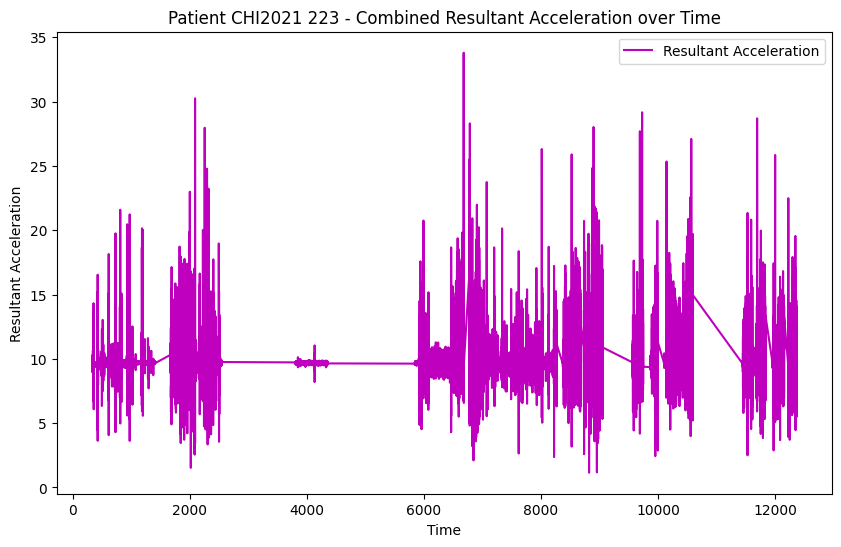

In [48]:
plotPatientAcc(matched_patients[0])

Patient CHI2021 223s Adjustment: 1763310.0 seconds


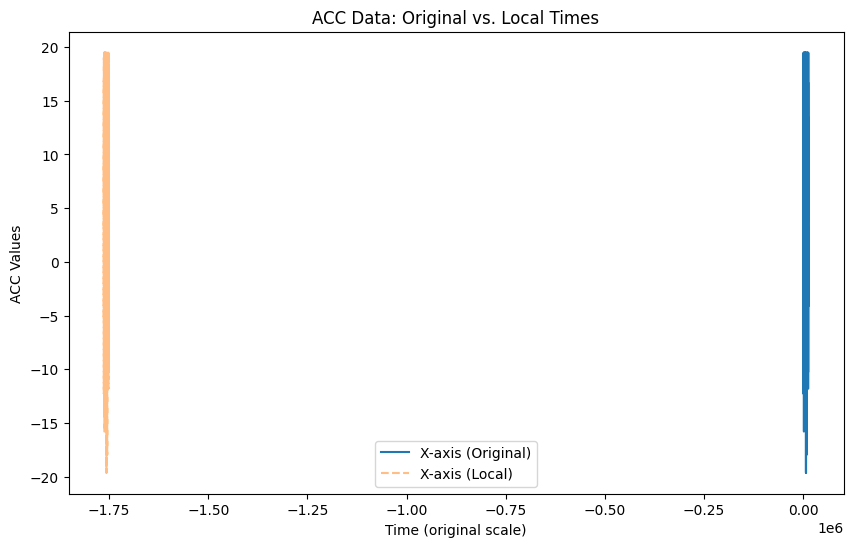

In [36]:
plot_sbs(matched_patients[0])

Patient CHI2021 223


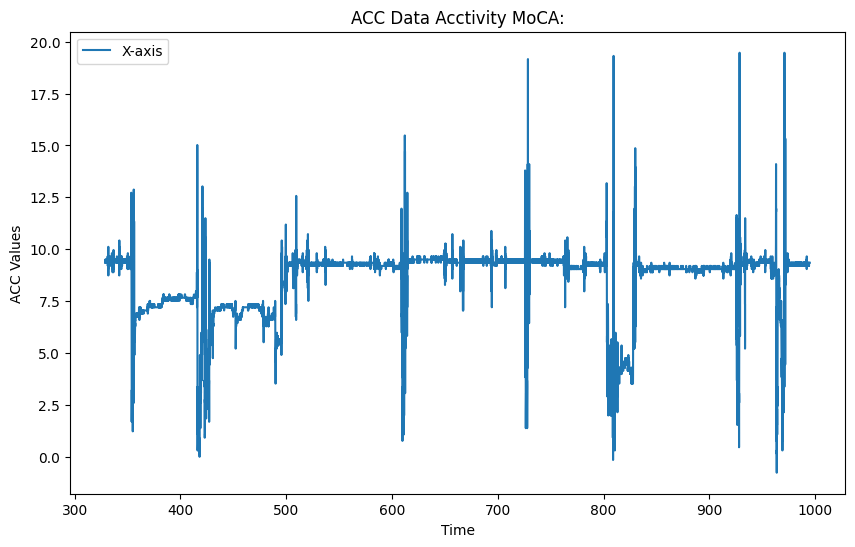

Patient CHI2021 223


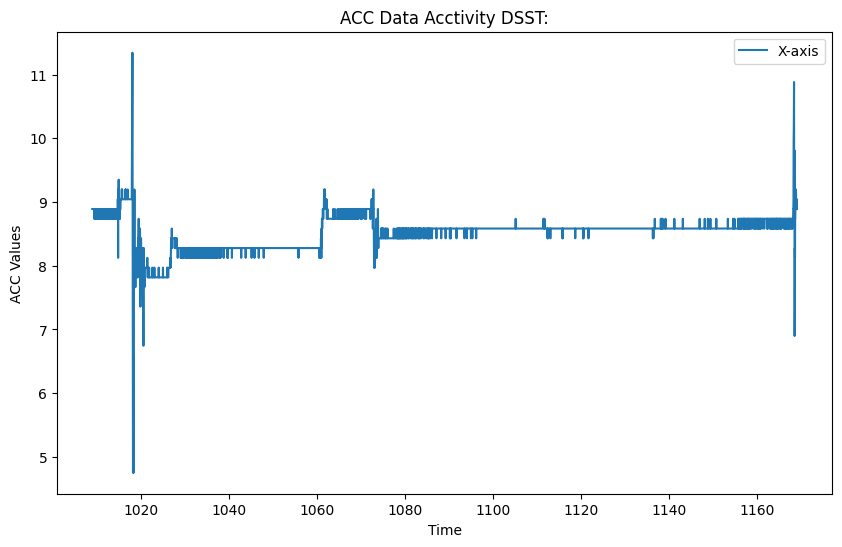

Patient CHI2021 223


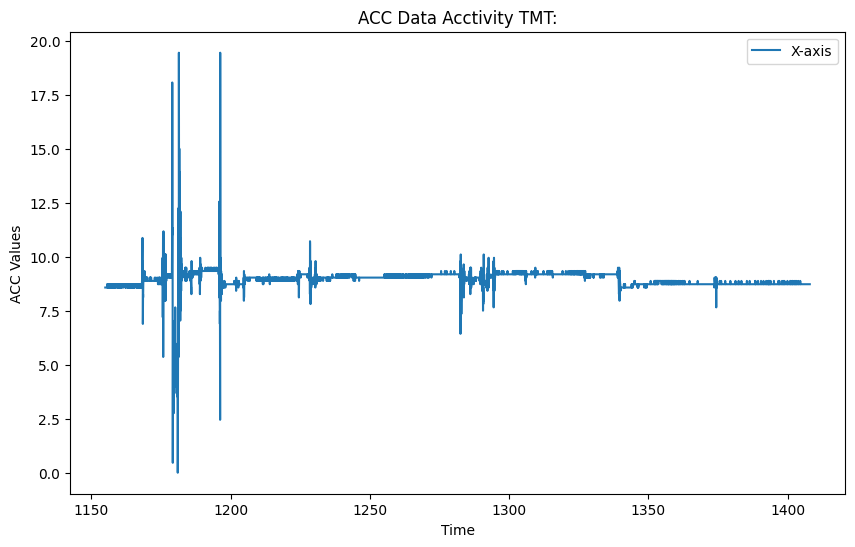

Patient CHI2021 223


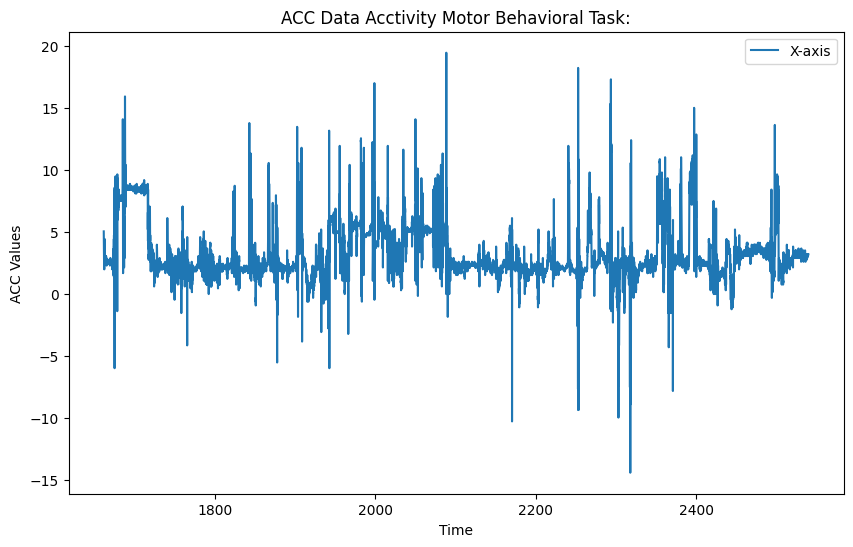

Patient CHI2021 223


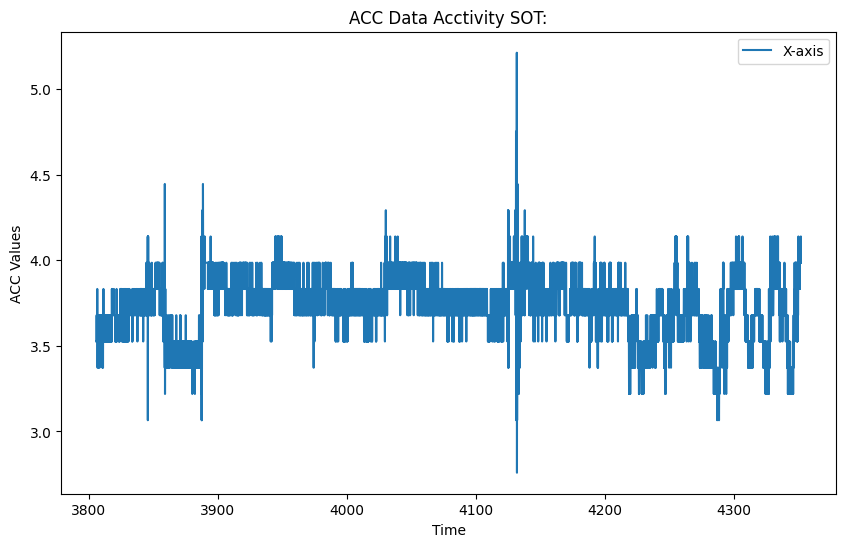

Patient CHI2021 223


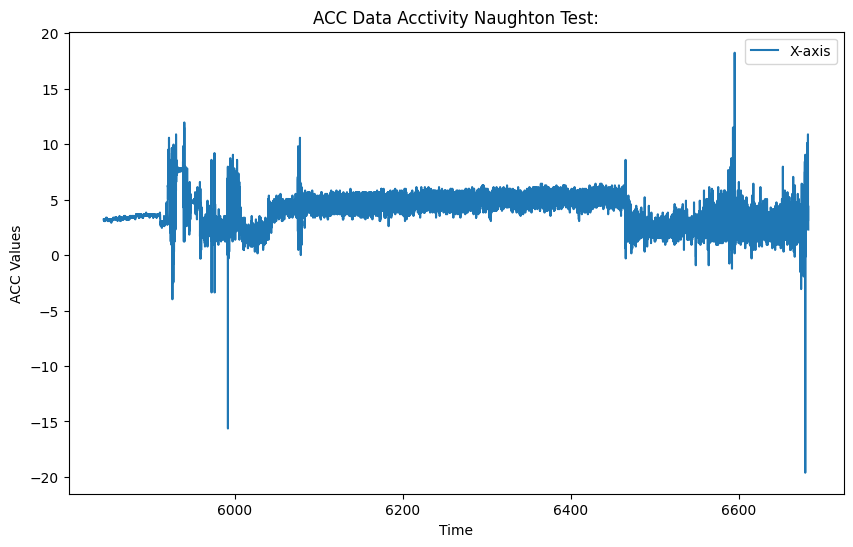

Patient CHI2021 223


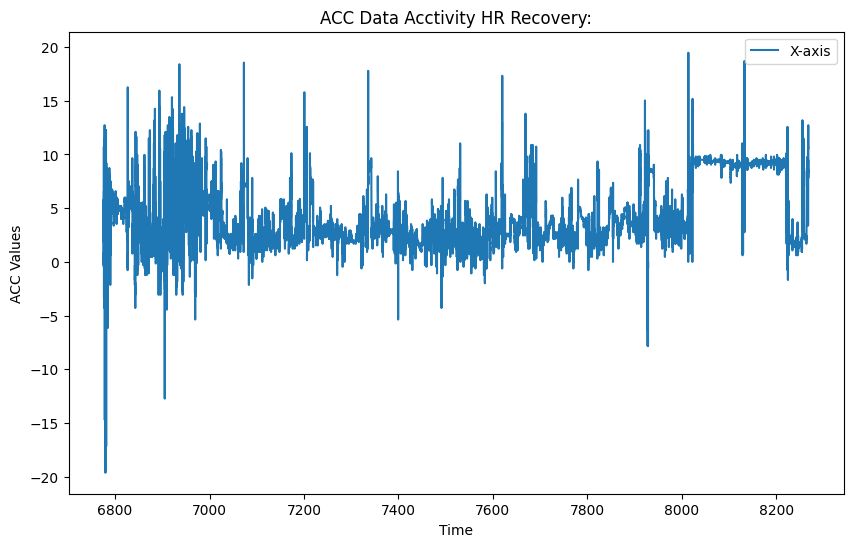

Patient CHI2021 223


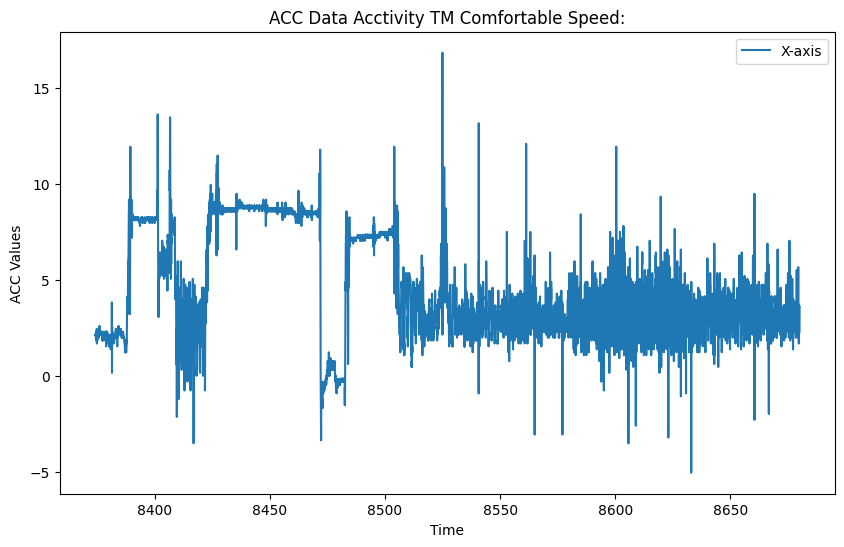

Patient CHI2021 223


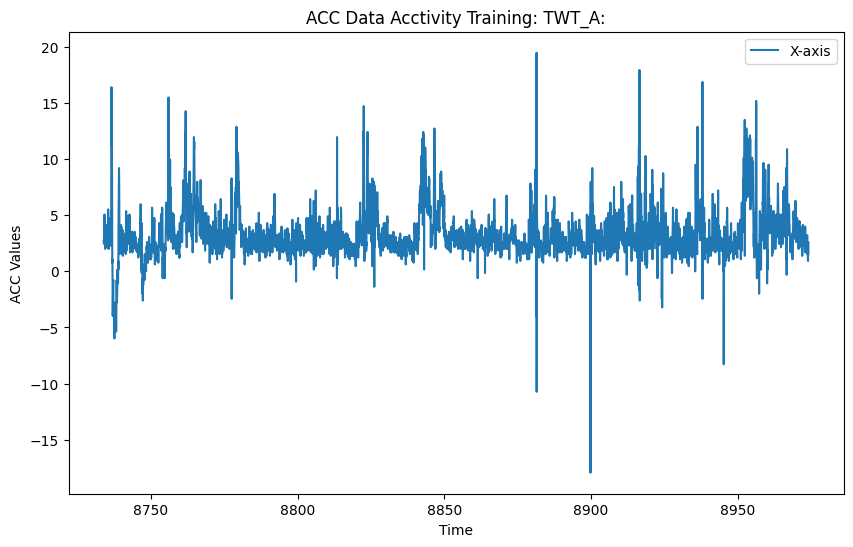

Patient CHI2021 223


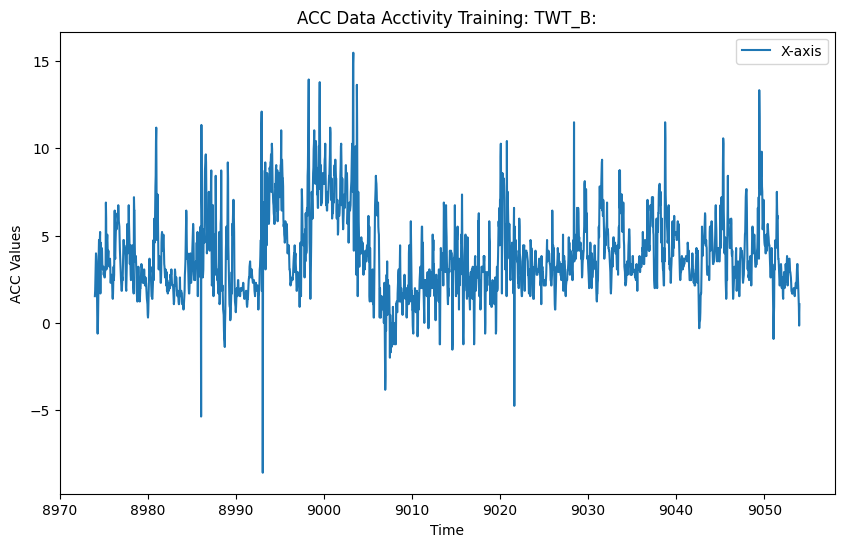

Patient CHI2021 223


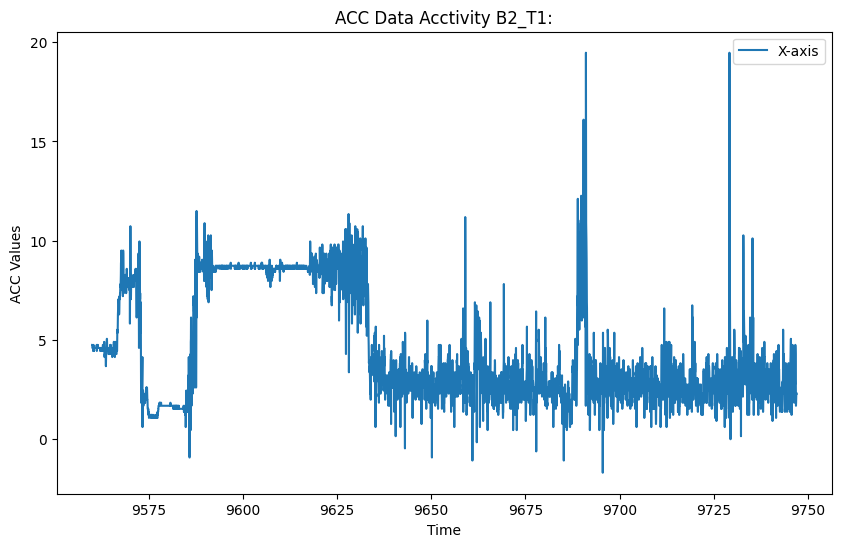

Patient CHI2021 223


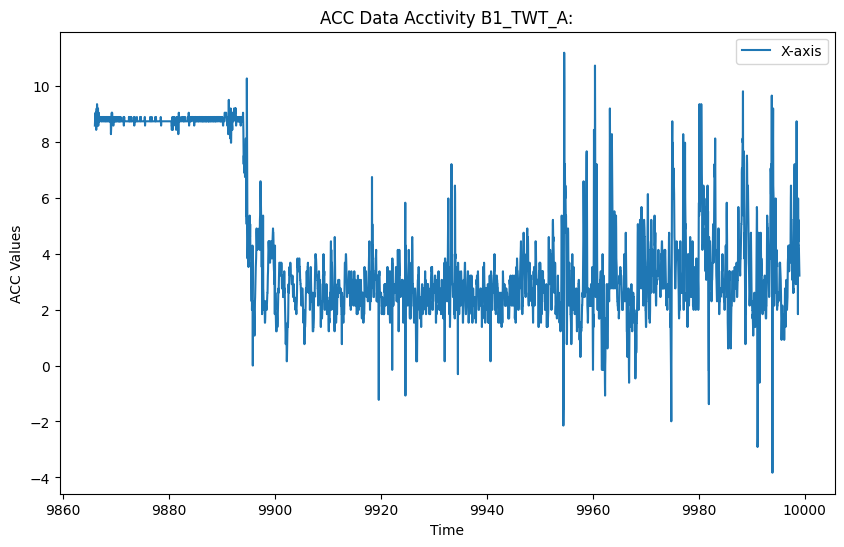

Patient CHI2021 223


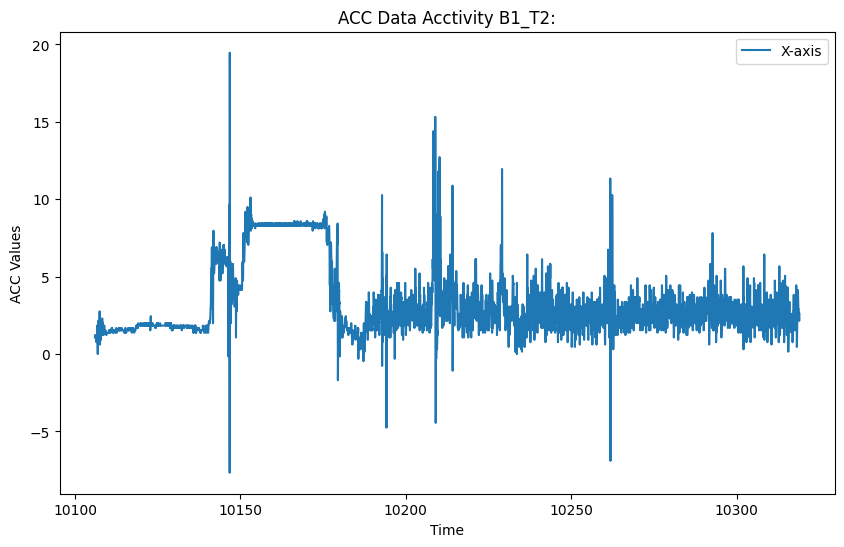

Patient CHI2021 223


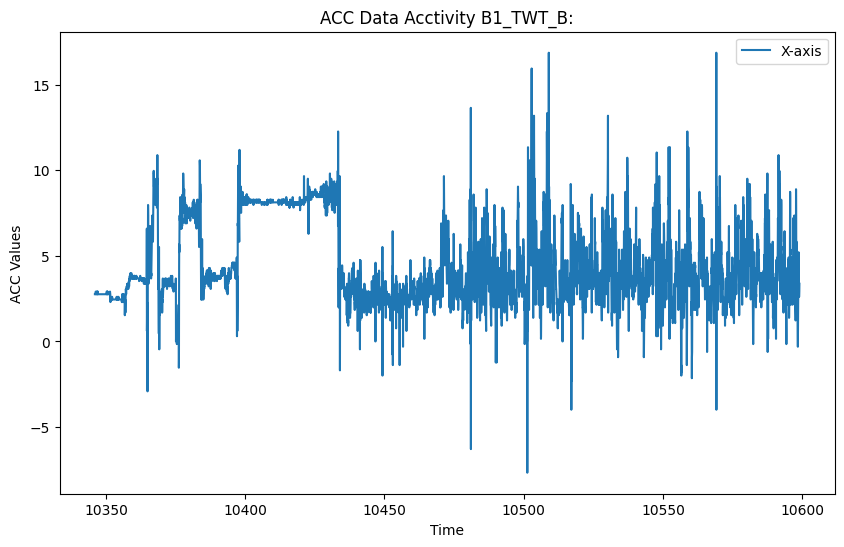

Patient CHI2021 223


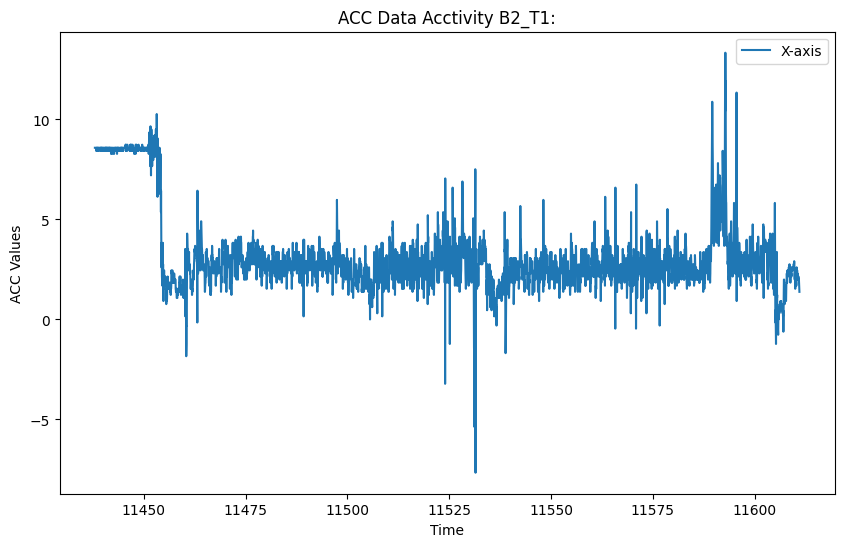

Patient CHI2021 223


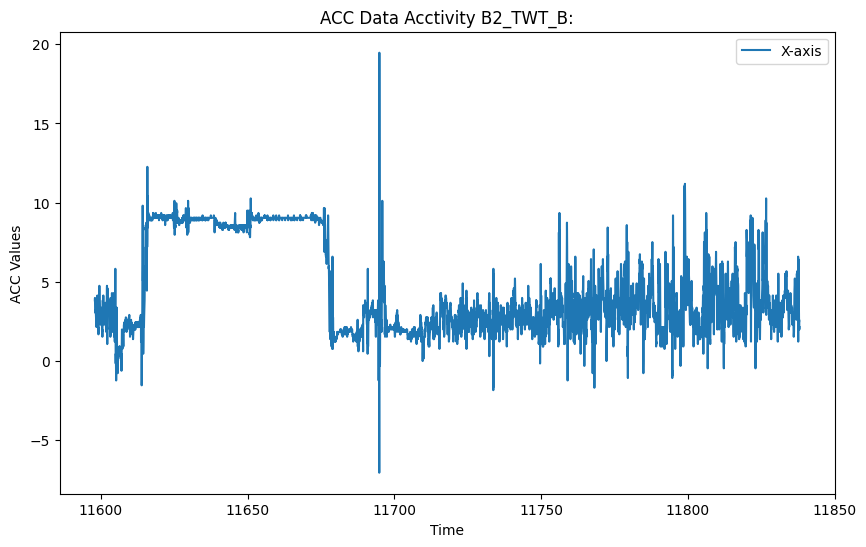

Patient CHI2021 223


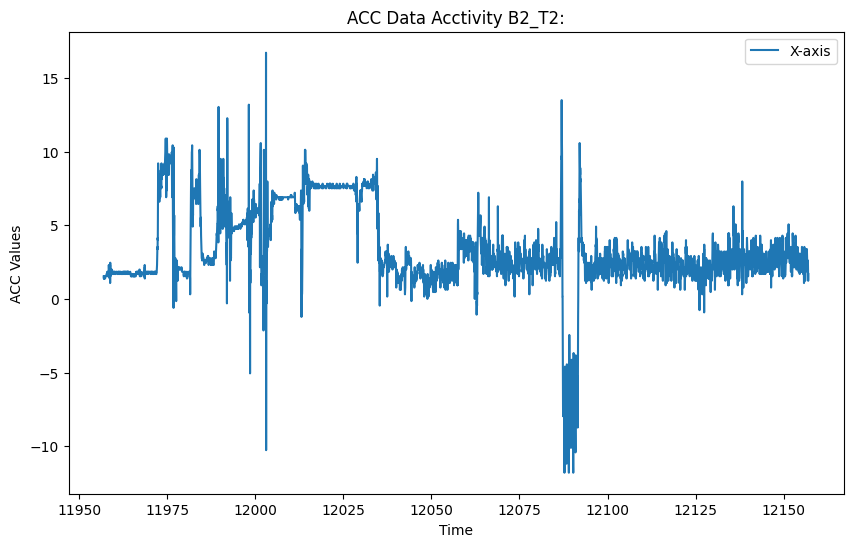

Patient CHI2021 223


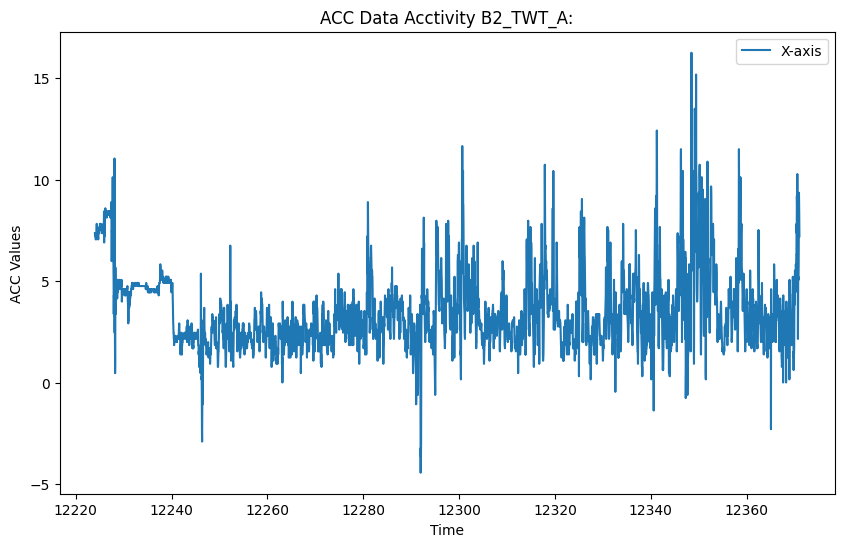

In [26]:
person_activities_plot(matched_patients[0])

In [304]:
print(matched_patients[0].activities[0].acc)

None
